<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>Deep Learning Basic Term Project Chandra Mohan Jan2020@INSAID




### Table of Content

1. [Problem Statement - Predict DEFCON (Defense Readiness Condition)](#section1)<br>
2. [Exploratory Data Analysis](#section2)
  - 2.1 [Setup the Environment](#section201)<br>
  - 2.2 [Get the Data](#section202)<br>
  - 2.3 [Inspect the Data](#section203)<br>
  - 2.4 [Split the Data into Train and Test](#section204)<br>
  - 2.5 [Basic EDA on the Train Data](#section205)<br>
  - 2.6 [One-Hot encode Target Variable](#section206)<br>
  - 2.7 [Normalize the Data](#section207)<br>
3. [The Model](#section3)<br>
  - 3.1 [Basic Model](#section301)<br>
    - 3.1.1 [Build the Model](#section3011)<br>
    - 3.1.2 [Inspect the Model](#section3012)<br>
    - 3.1.3 [Train the Model](#section3013)<br>
    - 3.1.4 [Model Evaluation](#section3014)<br>
  - 3.2 [Model Tuning](#sectio302)<br>
    - 3.2.1 [Increasing the Number of Hidden Layers and Hidden Units](#section3021)<br>
    - 3.2.2 [Weight Regularization](#section3022)<br>
    - 3.2.3 [Dropout](#section3023)<br>
    - 3.2.4 [Combined L2 + Dropout](#section3024)<br>
    - 3.2.5 [Batch Normalization](#section3025)<br>
  - 3.3 [Hyperparameter Tuning](#sectio303)<br>
    - 3.3.1 [Grid Search](#section3031)<br>
    - 3.3.2 [Hypermodel](#section3022)<br>
4. [Data Imbalance Treatment](#section4)<br>
  - 4.1 [Generate Data using SMOTE and run Models](#section401)<br>
    - 4.1.1 [The Base Model](#section4011)<br>
    - 4.1.2 [Multilayer Model](#section4012)<br>
    - 4.1.3 [Model with L2 Regulariser](#section4013)<br>
    - 4.1.4 [Model with Dropouts](#section4014)<br>
    - 4.1.5 [Model with Regularizer and Dropouts](#section4015)<br>
    - 4.1.6 [Batch Normalized Model](#section4016)<br>
    - 4.1.7 [Random Search Tuner](#section4017)<br>
  
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Predict DEFCON (Defense Readiness Condition)

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its
implications. The DEFCON system allows the nation’s forces to be a step ahead of its rivals
A country has set up the DEFCON (Defense Readiness Condition) warning system. Defense readiness conditions (DEFCONs) describe progressive alert postures primarily for use between the Joint Chiefs of Staff and the commanders of unified commands.
DEFCONs are graduated to match situations of varying military severity. DEFCONs are phased increases in combat readiness.
It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. In general terms, these are descriptions of DEFCONs:
- DEFCON 5 Normal peacetime readiness
- DEFCON 4 Normal, increased intelligence and - strengthened security measures
- DEFCON 3 Increase in force readiness above normal readiness
- DEFCON 2 Further Increase in force readiness, but less than maximum readiness
- DEFCON 1 Maximum force readiness.
####__Objective__
As part of this excercise we will use Deep learning to train our models on dataset which has all necessary features to predict the DEFCON level required at a particular instance. We will analyse the data, train models, test their accuracies, verify their predictions. Main objective of this would be to use all the concepts required for ensuring the model predicts with best accuracy as DEFCON a mission critical task.

We will use the [DEFCON](https://github.com/Archandra12/Deeplearning-Project/blob/data/defcon_level.csv) Dataset and build a model to predict the DEFCON level for a given situation.



<center><img src="https://github.com/Archandra12/Deeplearning-Project/blob/images/DEFCON.jpg" width="340" height="80" /></center>

#### The DEFCON Dataset - Description

| Column                     |Description        |
| ---------------------------|--------------------------|		
|Allied_Nations|:The number of nations that have joined together as allies.|
|Diplomatic_Meetings_Set|:The number of meetings with the intent to resolve the conflict that is planned.|
|Percent_Of_Forces_Mobilized |:The percentage of forces mobilized.|
|Hostile_Nations |:The number of enemy nations that have allied together.|
|Active_Threats|:The number of situations or threats that require immediate attention.|
|Inactive_Threats|:The number of situations or threats being monitored for activity or escalation.|
|Citizen_Fear_Index|:The percentage of citizens who fear catastrophic military conflicts.|
|Closest_Threat_Distance(km) |:The closest threat to the border of the country in question.|
|Aircraft_Carriers_Responding|:The number of aircraft carriers actively traveling towards a threat to neutralize it.||
|Troops_Mobilized(thousands)|:The number of troops that are activated and responding to the threats being the most.|
|DEFCON_Level |:A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (**target variable**)|
|ID|:An ID to aid a checker script.|


<a id=section2></a>
## 2. Exploratory Data Analysis

<a id=section201></a>
### 2.1 Setup the environment

In [1]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\nando\appdata\local\temp\pip-req-build-r7wpqi30
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0da72a01b9956ffdc3723d8fbcf3e04f96e4df171_-cp37-none-any.whl size=133684 sha256=80d9c1a20385d72a1c66043c092b1cc25d0e04602e1c7a30186bae791ca04ddb
  Stored in directory: C:\Users\nando\AppData\Local\Temp\pip-ephem-wheel-cache-itgelsg8\wheels\eb\1b\35\fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


  Running command git clone -q https://github.com/tensorflow/docs 'C:\Users\nando\AppData\Local\Temp\pip-req-build-r7wpqi30'


In [2]:
!pip install keras-tuner

In [3]:
!pip install tensorflow==2.3.1 --user

In [4]:
#importing common libraries
import pathlib
import numpy as np
import pandas as pd
#libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tensorflow
import tensorflow as tf
#import kerastuner, will be used for hyperparameter tuning
import kerastuner as kt
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
#lets check the version of tensorflow nd keras tuner
#print(tf.__version__)
#print(kt.__version__)
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from kerastuner.engine.hyperparameters import HyperParameters
from keras.callbacks import EarlyStopping, TensorBoard

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


- Some useful functions

In [5]:
#Function to plot Model accuracies
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    #plt.figure(1)
    for l in loss_list:
        ax1.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        ax1.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ## Accuracy
    #plt.figure(2)
    for l in acc_list:
        ax2.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        ax2.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

In [6]:
#Funcion to plot confusion matrix for the model prediction
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

<a id=section202></a>
### 2.2 Get the Data

- Load data using Pandas Dataframe

In [7]:
dataset_path = 'https://raw.githubusercontent.com/Archandra12/Deeplearning-Project/data/defcon_level.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


- We have a multiclass target variable [DEFCON Level] in our dataset

<a id=section203></a>
### 2.3 Inspect the Data



- Checking Datatype of each column of data

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


__Obseration:__ All data columns are numerical and there are no null values. Let's also check if there are columns with zero values

In [9]:
(dataset == 0).sum(axis=0)/100

Allied_Nations                   0.00
Diplomatic_Meetings_Set         47.63
Percent_Of_Forces_Mobilized      8.98
Hostile_Nations                  0.00
Active_Threats                   0.00
Inactive_Threats                 0.00
Citizen_Fear_Index               0.07
Closest_Threat_Distance(km)      0.00
Aircraft_Carriers_Responding    11.44
Troops_Mobilized(thousands)      0.00
DEFCON_Level                     0.00
ID                               0.00
dtype: float64

__Observation:__ as we can see Diplomatic_Meetings_Set has 47.63% zeros we are ok with that.

- Checking data distribution in each column

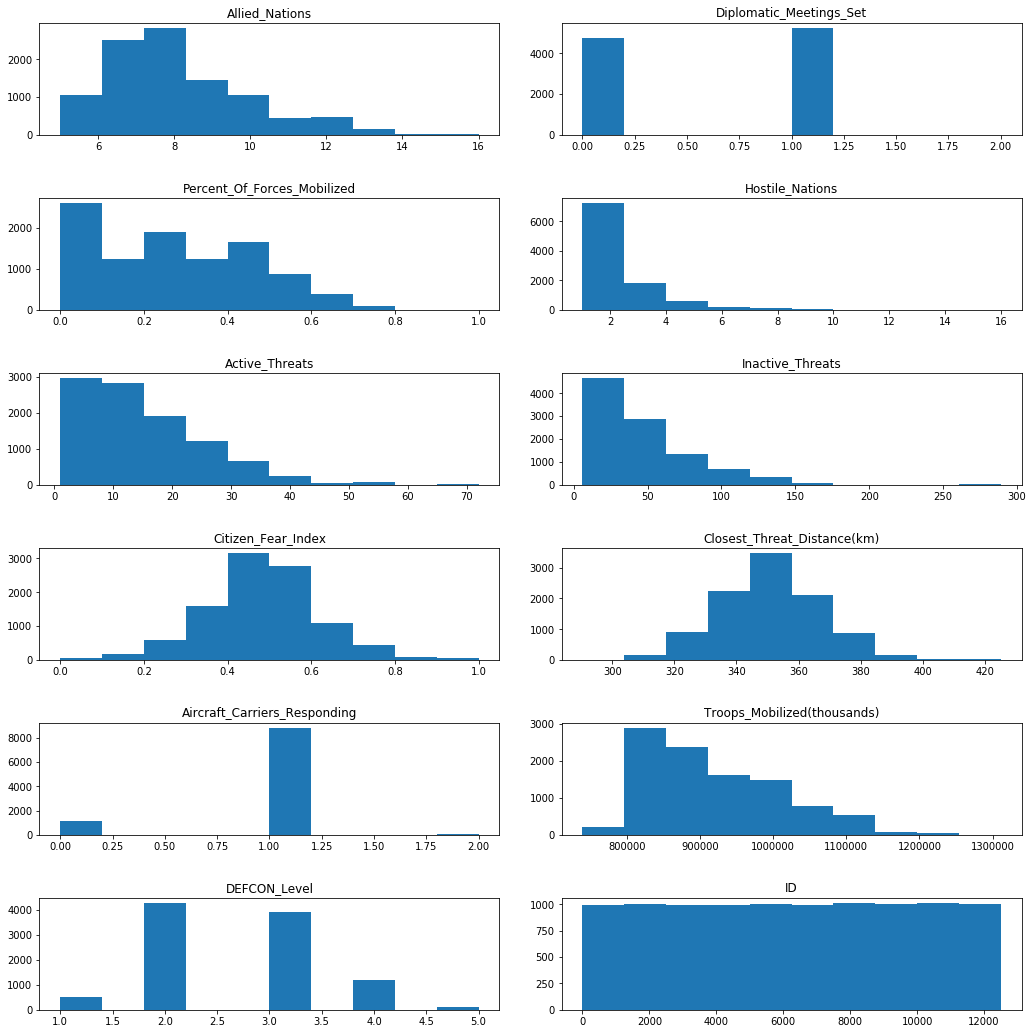

In [10]:
ig, axis = plt.subplots(6, 2, figsize=(15,15)) 
for i, column in enumerate(dataset.columns):
  axis[i//2, i%2].hist(dataset[column])
  axis[i//2, i%2].set_title(column)
ig.tight_layout(pad=3.0)  
  #print(i//2, i%2, column)

__Observation:__
- Data in all the columns have different scales
- ID column is a record identifier 
- Target variable DEFCON Level has maximum data for values 2 and 3. Percentage of records for level 1, 4 and 5 are less and this indicates data imbalance
- Aircraft carriers responding indicates most of the recors have values betwen 1 and 1.25
- Citizen fear index and Closest threats seem to spread normal but also indicate some correlation between them.
- Allied Nations, Percentage of forces mobilized, Active threats, Inactive threats and Troops(Mobilized) have right scewed data 

- Checking Unique values in ID column

In [11]:
dataset.ID.nunique()

10000

__Observation:__ ID column has unique values and we can drop it.

In [12]:
dataset.drop(['ID'], axis=1, inplace=True)

- As our target column is multiple class let's see the overall data distribution for DEFCON level

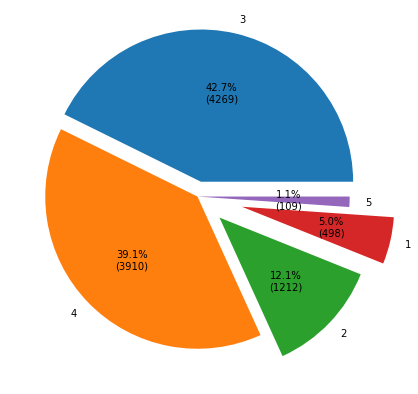

In [13]:
#dataset['DEFCON_Level'].value_counts().plot(kind='pie')
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ig = plt.figure(figsize =(10, 7))    
data = dataset['DEFCON_Level'].value_counts()
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
plt.pie(data, labels=dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)
plt.show()

__Observation:__ We can see that we have just above 1% of records for DEFCON level5 and 5% records for DEFCON level1. We must use Data sampling techniques to make our data balanced. Alternatively, we will pass different class weights to models. 

- Draw heatmap on the dataset

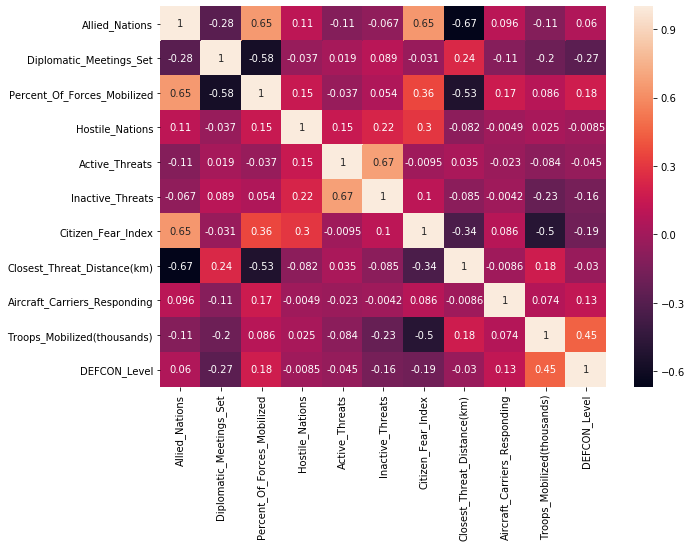

In [14]:
# plotting the heatmap

fig= plt.figure(figsize=(10,7))
ax = sns.heatmap(data = dataset.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
  
# displaying the plotted heatmap
plt.show()

Observation: 
- Hostile Nations seem to have no impact on DEFCON Level
- Aircraft_Carrers_Responding has low corelation with amost all features
- Active_Threats and Inactive_Threats have strong correlation
- Percentage_of_forced_Mobilized has negative correlation with Dipomatic_Meetings_Set
- Citizen_Fear_Index and Allied_Nations have strong positive correlation

- Let's check feature importance so that we can decide which all features we will take forward for our modelling

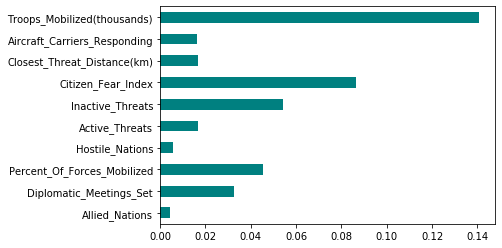

In [15]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(dataset.iloc[:, dataset.columns!='DEFCON_Level'],dataset['DEFCON_Level'])
feat_importance= pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feat_importance.plot(kind='barh',color='teal')
plt.show()

__Observation:__ Most important feature is Troop_Mobilized(thousands) that too has 16% probability to influence the DEFCON level.

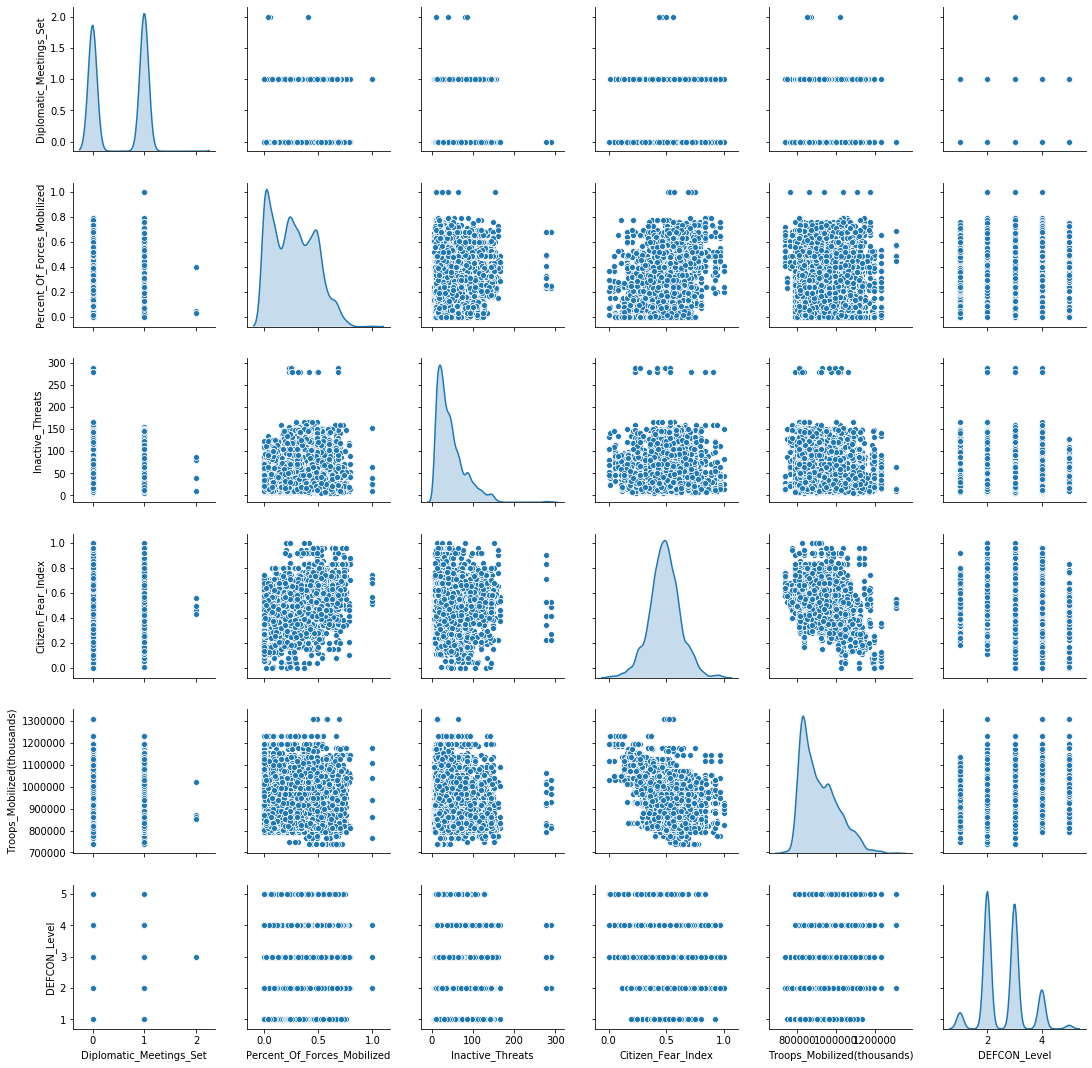

In [16]:
sns.pairplot(dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level']], diag_kind="kde")

- Troops_Mobilized and Citizen_fear_index show slight correlation other features don't show any correlations

<a id=section204></a>
### 2.4 Split the Data into Train, Val, Test
- Let's take only ['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level'] features in our final dataset
- Now we will split the dataset into a training set , Validation set and a test set.
- As our dataset shows imbalane of classes, we will have to pass weights on our models

- We will use the test set in the final evaluation of our model.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
X = dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)']]
y = dataset['DEFCON_Level']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

1

In [18]:
X.iloc

In [19]:
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [9610 2401 2981 ... 6159  609 9110] TEST: [9964 4050 3768 ... 6223 2334 9428]


In [20]:
sss.get_n_splits(X_train, y_train)

1

In [21]:
for train_index, test_index in sss.split(X_train, y_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

TRAIN: [6560 2732 5443 ... 2063 7770 5958] TEST: [7307 3169 2878 ... 1705 2414 4595]


In [22]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6400, 5), (6400,), (1600, 5), (1600,), (2000, 5), (2000,))

- let's check data distribution

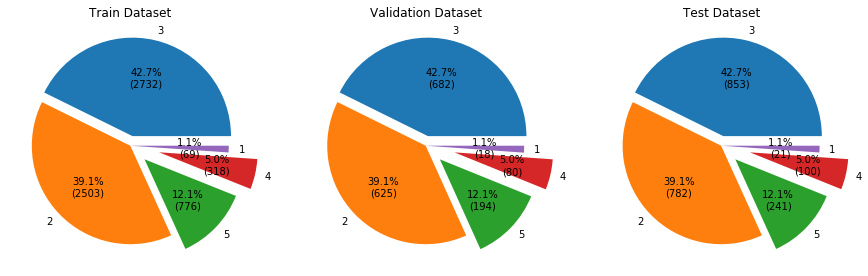

In [23]:
ig, axis = plt.subplots(1, 3, figsize=(15,15)) 
#ig = plt.figure(figsize =(15, 10))   

explode = (0.1, 0.0, 0.2, 0.3, 0.0)

labels = pd.DataFrame(data=y_train, columns=['DEFCON_Level'])['DEFCON_Level'].unique()
data = pd.DataFrame(data=y_train, columns=['DEFCON_Level']).value_counts()
axis[0].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_val, columns=['DEFCON_Level']).value_counts()
axis[1].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_test, columns=['DEFCON_Level']).value_counts()
axis[2].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)
axis[0].title.set_text('Train Dataset')
axis[1].title.set_text('Validation Dataset')
axis[2].title.set_text('Test Dataset')
plt.show()

__Observation:__ Our dataset is distributed with proportionate count for each class

<a id=section205></a>
### 2.5 Basic EDA on the Train Data



Feature importance of features on test data

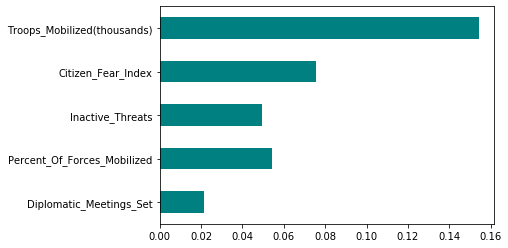

In [24]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X_train,y_train)
feat_importance= pd.Series(importances, X_train.columns[0:len(X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

- Drawing heatmap to see the correlation among variables

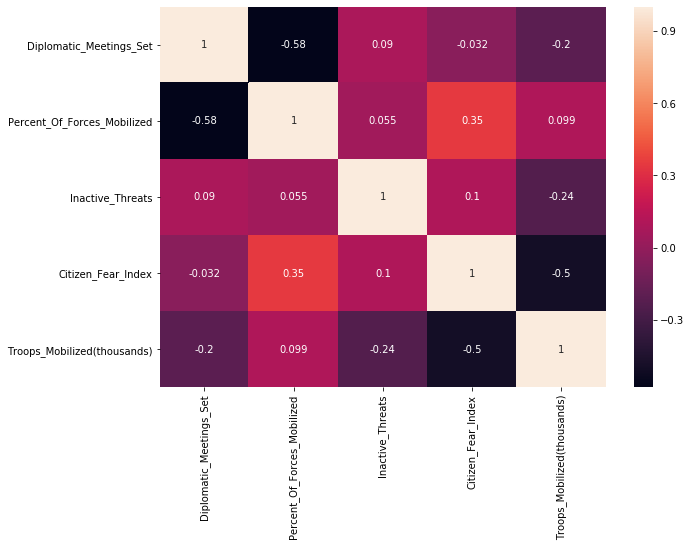

In [25]:
# plotting the heatmap
fig= plt.figure(figsize=(10,7))
ax = sns.heatmap(data = X_train.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
 
# displaying the plotted heatmap
plt.show()

__Observations:__ None of the features look collinear

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

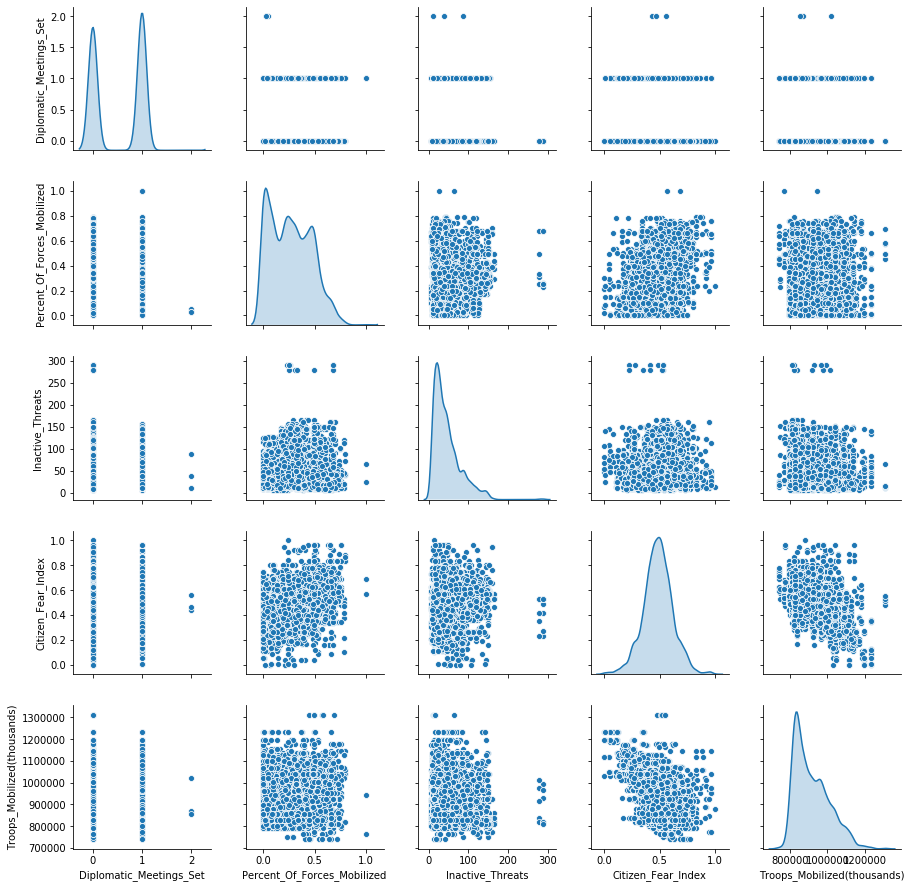

In [26]:
sns.pairplot(X_train, diag_kind='kde')
plt.show()

__Observation:__ As seen in the heatmap as well. We don't have multicollinearity in our data

<a id=section206></a>
### 2.6 One-Hot encode Target Variable

As our problem is multiclassLabel we will encode the target variable and also perform one-hot encoding on them. 

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Label encode train target variable
le.fit(y_train)
y_train = le.transform(y_train)

#Label encode val target variable
le.fit(y_val)
y_val = le.transform(y_val)

#Label encode test target variable
le.fit(y_test)
y_test = le.transform(y_test)

# as our target variable is multiclass we will convert to dummy variables (i.e. one hot encoded) for training data
y_train_dummy = np_utils.to_categorical(y_train, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_val_dummy = np_utils.to_categorical(y_val, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_test_dummy = np_utils.to_categorical(y_test, num_classes=5)


In [28]:
# checking shapes of train nd test target variables 
print(f"Features Shape: Train {X_train.shape}  Validation {X_val.shape} Test {X_test.shape}")
print(f"Target Shape: Train {y_train_dummy.shape} Validation {y_val_dummy.shape} Test {y_test_dummy.shape}")


Features Shape: Train (6400, 5)  Validation (1600, 5) Test (2000, 5)
Target Shape: Train (6400, 5) Validation (1600, 5) Test (2000, 5)


<a id=section207></a>
### 2.7 Normalize the Data

- Our dataset has features in multiple scales. We will normalize the data. Let's check some statistics of train dataset

In [29]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Diplomatic_Meetings_Set,6400.0,0.528906,0.500141,0.0,0.000000,1.000000,1.000000,2.0
Percent_Of_Forces_Mobilized,6400.0,0.269822,0.195724,0.0,0.090000,0.260000,0.430000,1.0
Inactive_Threats,6400.0,46.660313,33.914757,6.0,21.000000,38.000000,62.000000,289.0
Citizen_Fear_Index,6400.0,0.485979,0.133113,0.0,0.406021,0.486784,0.567548,1.0
Troops_Mobilized(thousands),6400.0,917051.895833,92573.315491,739200.0,836000.000000,897600.000000,976800.000000,1311200.0


In [30]:
train_stats['mean']

Diplomatic_Meetings_Set             0.528906
Percent_Of_Forces_Mobilized         0.269822
Inactive_Threats                   46.660313
Citizen_Fear_Index                  0.485979
Troops_Mobilized(thousands)    917051.895833
Name: mean, dtype: float64

__Observation:__ All features are in different scales. 


- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the vaidation and test dataset.

  - We need to do that to project the validation and test dataset into the same distribution that the model has been trained on.

In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [32]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Diplomatic_Meetings_Set,6400.0,0.528906,0.500141,0.0,0.000000,1.000000,1.000000,2.0
Percent_Of_Forces_Mobilized,6400.0,0.269822,0.195724,0.0,0.090000,0.260000,0.430000,1.0
Inactive_Threats,6400.0,46.660313,33.914757,6.0,21.000000,38.000000,62.000000,289.0
Citizen_Fear_Index,6400.0,0.485979,0.133113,0.0,0.406021,0.486784,0.567548,1.0
Troops_Mobilized(thousands),6400.0,917051.895833,92573.315491,739200.0,836000.000000,897600.000000,976800.000000,1311200.0


In [33]:
#Normalizing data for train, val and test
normed_X_train = norm(X_train)
normed_X_val = norm(X_val)
normed_X_test = norm(X_test)
print('Check the shape of normalized features datasets: ', normed_X_train.shape, normed_X_val.shape, normed_X_test.shape )

Check the shape of normalized features datasets:  (6400, 5) (1600, 5) (2000, 5)


- This normalized data is what we will use to train the model.

- The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

  - That includes the test set as well as live data when the model is used in production.

In [34]:
normed_X_train.describe()

,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Inactive_Threats,Citizen_Fear_Index,Troops_Mobilized(thousands)
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,8.708312e-17,1.311798e-14,-5.294376e-17,-1.017233e-15,-2.869874e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.057514e+00,-1.378580e+00,-1.198897e+00,-3.650876e+00,-1.921200e+00
25%,-1.057514e+00,-9.187500e-01,-7.566120e-01,-6.006812e-01,-8.755428e-01
50%,9.419219e-01,-5.018214e-02,-2.553553e-01,6.048335e-03,-2.101242e-01
75%,9.419219e-01,8.183857e-01,4.523013e-01,6.127779e-01,6.454139e-01
max,2.941358e+00,3.730642e+00,7.145553e+00,3.861539e+00,4.257686e+00


- Check for multicollinearity among features once again

In [35]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = normed_X_train.iloc[:,:]
display(calc_vif(X))

,variables,VIF
0,Diplomatic_Meetings_Set,1.617619
1,Percent_Of_Forces_Mobilized,1.955128
2,Inactive_Threats,1.089284
3,Citizen_Fear_Index,1.733989
4,Troops_Mobilized(thousands),1.588159


__Observation:__ None of the column has VIF value more than which indicates there are is no multicollinearity

#### Final Check on feature importance on normalized Data

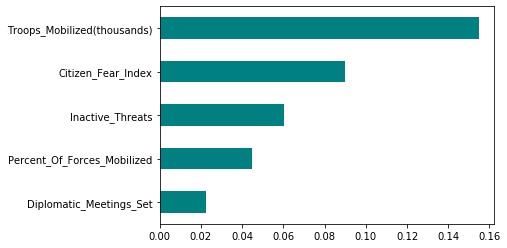

In [36]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(normed_X_train,y_train)
feat_importance= pd.Series(importances, normed_X_train.columns[0:len(normed_X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

<a id=section3></a>
## 3. The Models

<a id=section301></a>
### 3.1 Basic Model



<a id=section3011></a>
#### 3.1.1 Model Definition

- Let's build our model.

11 inputs -> [8 hidden nodes] -> 5 outputs </br> Layer Activation: 'Relu'</br>
Output Layer Activation: “softmax” ; This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.</br>
Finally, the network uses the efficient 'Adam' gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras. We will be evaulating 'Accuracy' of the model as metric

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [37]:
#Checking number of inputs features and output nodes
normed_X_train.shape[1], y_train_dummy.shape[1]

(5, 5)

- We have 5 outputs
- As we have imbalance data let's pass weights classes differently

In [38]:
def class_weight(labels_dict,mu=0.15):
  total = np.sum(labels_dict.values())
  keys = labels_dict.keys()
  weight = dict()
  for i in keys:
    score = np.log(mu*6400/float(labels_dict[i]))
    weight[i] = score if score > 1 else 1
  return weight
# random labels_dict
labels_dict = pd.DataFrame(data=y_train, columns=['DEFCON_Level'])['DEFCON_Level'].value_counts().to_dict()
weights = class_weight(labels_dict)
weights
#print(labels_dict)
#total =np.sum(labels_dict.values())
#total

{1: 1, 2: 1, 3: 1, 0: 1.104881901681705, 4: 2.618438042412523}

- Define the model

In [39]:
input_shape = (normed_X_train.shape[1],)
print('Input Shape:', input_shape)
output_shape = y_train_dummy.shape[1]
print('Output Shape: ', output_shape)

Input Shape: (5,)
Output Shape:  5


In [40]:
def build_model():
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=input_shape,  kernel_initializer='zeros'))
  model.add(Dense(output_shape, activation='softmax'))  

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)
  # Compiling the model
  model.compile( optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

  return model
model = build_model()

<a id=section3012></a>
#### 3.1.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


- Our mode has just two layers and parmeters for first hidden layers are 88 (10(feasures) * 8 (nodes)=80 + 8 biases). Similarly for second layer we have 45 paramters (8 (inputs from first layer)*5(nodes)=40 + 5 biases)
- Now let's try out the model.

- without training the model taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [42]:
example_batch = normed_X_train[:10]
example_result = model.predict(example_batch)
print('Shape of Predictions: ', example_result.shape)
example_result

Shape of Predictions:  (10, 5)


array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

- It seems to be working, and it produces a result of the expected shape and type.

- We haven't trained the model yet, and as a result the above predictions are like this. 

<a id=section3013></a>
#### 3.1.3 Train the Model

- Training the model for 200 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [43]:
EPOCHS = 200

In [44]:
history = model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4189,  loss:1.5787,  val_accuracy:0.4269,  val_loss:1.4777,  
....................
Epoch: 20, accuracy:0.4270,  loss:1.2711,  val_accuracy:0.4269,  val_loss:1.1962,  
....................
Epoch: 40, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1937,  
....................
Epoch: 60, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1934,  
....................
Epoch: 80, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1936,  
....................
Epoch: 100, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 120, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 140, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 160, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 180, accuracy:0.4270,  loss:1.2707,  val_acc

<a id=section3014></a>
#### 3.1.4 Model Evaluation

- Visualizing the model's training progress using the stats stored in the `history` object.

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.270745,0.427031,1.193549,0.426875,195
196,1.270739,0.427031,1.193565,0.426875,196
197,1.270700,0.427031,1.193464,0.426875,197
198,1.270751,0.427031,1.193517,0.426875,198
199,1.270721,0.427031,1.193542,0.426875,199


- Plotting the **accuracy** plot for train and val set.
- Plotting the **loss** plot for train and val set.

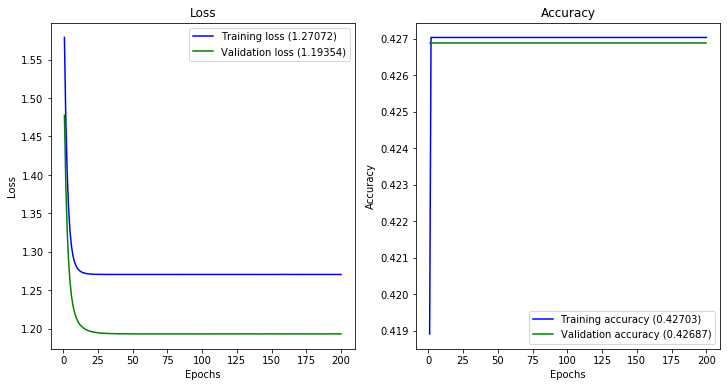

In [46]:
plot_history(history)

- Looking at Accuracy graph we can see training and validation accuracy does not reach beyond 45%. It seems model is not learning enough to do predictions

- Also, it appears that model is not learning after certain epohs

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training. Here we are adding a patience of 20 epochs

##### Full report on the Validation Set

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy : 0.426875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.42688   1.00000   0.59834       683
           2    0.00000   0.00000   0.00000       625
           3    0.00000   0.00000   0.00000       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.42687      1600
   macro avg    0.08538   0.20000   0.11967      1600
weighted avg    0.18222   0.42688   0.25541      1600

[[  0  80   0   0   0]
 [  0 683   0   0   0]
 [  0 625   0   0   0]
 [  0 194   0   0   0]
 [  0  18   0   0   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


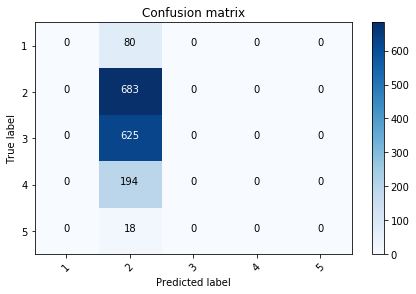

In [47]:
full_multiclass_report(model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full report on Test Dataset

Accuracy : 0.427

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.42700   1.00000   0.59846       854
           2    0.00000   0.00000   0.00000       782
           3    0.00000   0.00000   0.00000       242
           4    0.00000   0.00000   0.00000        22

    accuracy                        0.42700      2000
   macro avg    0.08540   0.20000   0.11969      2000
weighted avg    0.18233   0.42700   0.25554      2000

[[  0 100   0   0   0]
 [  0 854   0   0   0]
 [  0 782   0   0   0]
 [  0 242   0   0   0]
 [  0  22   0   0   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


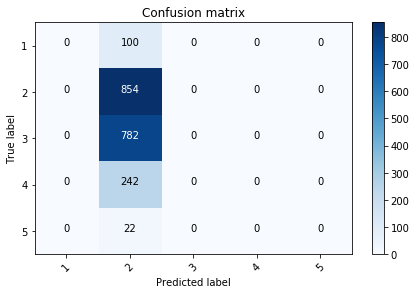

In [48]:
full_multiclass_report(model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

#### Train the Model with Early Stopping

In [49]:
es_model = build_model()

In [50]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [51]:
early_history = es_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots( report_every=30)])




Epoch: 0, accuracy:0.4022,  loss:1.5799,  val_accuracy:0.4269,  val_loss:1.4789,  
..............................
Epoch: 30, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1941,  
..............................
Epoch: 60, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1936,  
...........................

#### Evaulate EarlyStopping model 

In [52]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
82,1.270768,0.427031,1.193535,0.426875,82
83,1.270756,0.427031,1.193597,0.426875,83
84,1.270719,0.427031,1.193594,0.426875,84
85,1.270723,0.427031,1.193482,0.426875,85
86,1.270734,0.427031,1.193536,0.426875,86


- The training stopped before completing the 75 epochs due to our EarlyStopping callback as model was not showing improvement



##### Plotting training history 

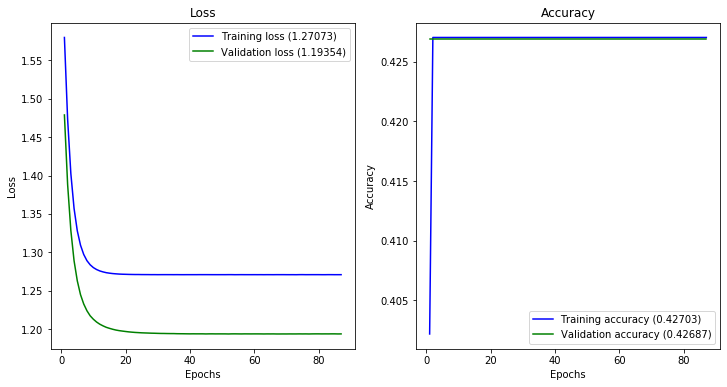

In [53]:
plot_history(early_history)

##### Full Model performance report on Val dataset

Accuracy : 0.426875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.42688   1.00000   0.59834       683
           2    0.00000   0.00000   0.00000       625
           3    0.00000   0.00000   0.00000       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.42687      1600
   macro avg    0.08538   0.20000   0.11967      1600
weighted avg    0.18222   0.42688   0.25541      1600

[[  0  80   0   0   0]
 [  0 683   0   0   0]
 [  0 625   0   0   0]
 [  0 194   0   0   0]
 [  0  18   0   0   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


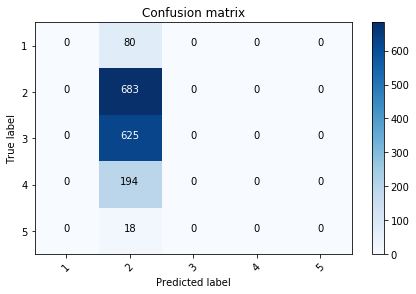

In [54]:
full_multiclass_report(es_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Model performance report on Test dataset

Accuracy : 0.427

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.42700   1.00000   0.59846       854
           2    0.00000   0.00000   0.00000       782
           3    0.00000   0.00000   0.00000       242
           4    0.00000   0.00000   0.00000        22

    accuracy                        0.42700      2000
   macro avg    0.08540   0.20000   0.11969      2000
weighted avg    0.18233   0.42700   0.25554      2000

[[  0 100   0   0   0]
 [  0 854   0   0   0]
 [  0 782   0   0   0]
 [  0 242   0   0   0]
 [  0  22   0   0   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


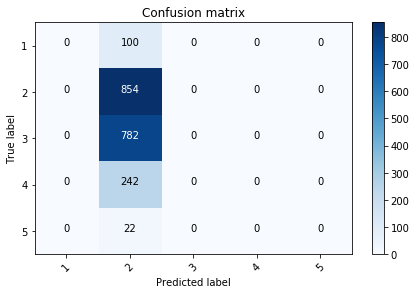

In [55]:
full_multiclass_report(es_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

__Observation:__

- Confusion matrix for Validation as well as Test dataset show that model Predicts DEFCON level2 for all the records 

- So far not a good performance. We will try with other option to tune the models

<a id=section302></a>
### 3.2. Model Tuning

- We have not achieved good performance from our models as yet 

- Let's experiment some additional methods to **improve** the model **performance**



<a id=section3021></a>
#### 3.2.1 Increasing the Number of Hidden Layers and Hidden Units

- Increasing number of layers and also inceasing number of nodes in each layer

- Define the Model

In [56]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_shape, activation='softmax'))  


  return model
multilayered_model = build_model()

- Inspect the Model

In [57]:
multilayered_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 3,525
Trainable params: 3,525
Non-trainable params: 0
_________________________________________________________________


- Compile the Model

Lets try with a different optimizer this time

In [58]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
multilayered_model.compile( optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


- We are not using the Early Stopping callback now.

- The model will be trained for **20 epochs**.

In [59]:
history_multilayered = multilayered_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5113,  loss:1.2278,  val_accuracy:0.5319,  val_loss:1.0614,  
....................
Epoch: 20, accuracy:0.5816,  loss:1.0103,  val_accuracy:0.5381,  val_loss:1.0158,  
....................
Epoch: 40, accuracy:0.5920,  loss:0.9725,  val_accuracy:0.5475,  val_loss:1.0024,  
....................
Epoch: 60, accuracy:0.6037,  loss:0.9499,  val_accuracy:0.5356,  val_loss:1.0325,  
....................
Epoch: 80, accuracy:0.6020,  loss:0.9331,  val_accuracy:0.5325,  val_loss:1.0371,  
....................
Epoch: 100, accuracy:0.6166,  loss:0.9196,  val_accuracy:0.5362,  val_loss:1.0517,  
....................
Epoch: 120, accuracy:0.6141,  loss:0.9074,  val_accuracy:0.5300,  val_loss:1.0591,  
....................
Epoch: 140, accuracy:0.6175,  loss:0.8954,  val_accuracy:0.5312,  val_loss:1.0943,  
....................
Epoch: 160, accuracy:0.6211,  loss:0.8884,  val_accuracy:0.5300,  val_loss:1.0905,  
....................
Epoch: 180, accuracy:0.6242,  loss:0.8840,  val_acc

In [60]:
df_multilayered_model = pd.DataFrame(history_multilayered.history)
df_multilayered_model['epoch'] = history_multilayered.epoch
df_multilayered_model.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.880653,0.622500,1.160943,0.524375,195
196,0.879023,0.627187,1.185802,0.541250,196
197,0.883577,0.627813,1.108909,0.538125,197
198,0.887560,0.622500,1.149107,0.526250,198
199,0.882615,0.622187,1.171290,0.526875,199


- Plotting history of Model run of multirun model

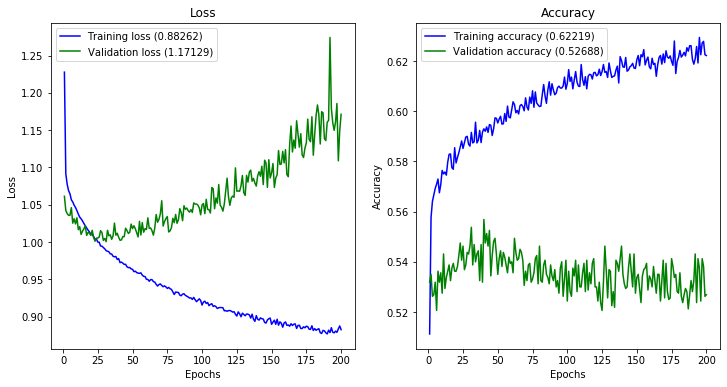

In [61]:
plot_history(history_multilayered)

__Observation:__
- For first 20 EPOCHS training and validation loss fell alike and after that validation loss began to increase
- Training accuracy increased but validation accuracy stayed almost similar after 20 EPOCHS
- Accuracy Scores are still not very good

#####Full Report of Model performance on Validation Data

Accuracy : 0.526875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.64375   0.60322   0.62283       683
           2    0.47761   0.61440   0.53744       625
           3    0.45361   0.22680   0.30241       194
           4    0.06383   0.16667   0.09231        18

    accuracy                        0.52687      1600
   macro avg    0.32776   0.32222   0.31100      1600
weighted avg    0.51709   0.52687   0.51351      1600

[[  0  43  35   1   1]
 [  8 412 251   3   9]
 [  4 173 384  45  19]
 [  0  12 123  44  15]
 [  0   0  11   4   3]]


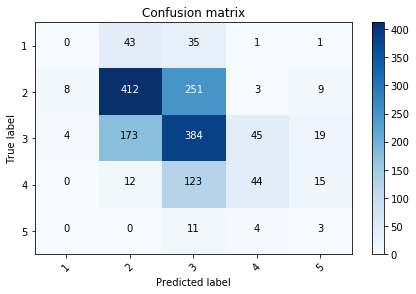

In [62]:
full_multiclass_report(multilayered_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Report of Model performance on Test Data

Accuracy : 0.537

Classification Report
              precision    recall  f1-score   support

           0    0.15789   0.03000   0.05042       100
           1    0.66884   0.60070   0.63294       854
           2    0.49447   0.62916   0.55374       782
           3    0.44361   0.24380   0.31467       242
           4    0.08140   0.31818   0.12963        22

    accuracy                        0.53700      2000
   macro avg    0.36924   0.36437   0.33628      2000
weighted avg    0.54140   0.53700   0.52880      2000

[[  3  47  47   2   1]
 [  7 513 316   7  11]
 [  6 186 492  56  42]
 [  3  20 135  59  25]
 [  0   1   5   9   7]]


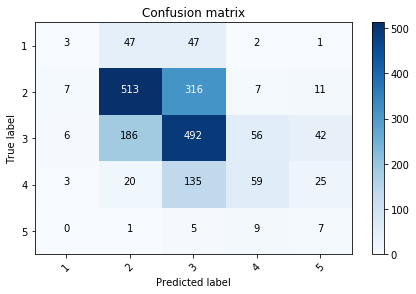

In [63]:
full_multiclass_report(multilayered_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [64]:
# evaluate the model
_, train_acc = multilayered_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = multilayered_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.612, Test: 0.537


__Observation:__

- We get a slight increase in the test set results.

- It seems the deeper model is **overfitting** the train set.

- The performanceis still not up to the mark

- We will continue with other options to improve our model performance

<a id=section3022></a>
#### 3.2.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [65]:
from tensorflow.keras import regularizers

In [66]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  
  

  return model
l2_model = build_model()

- `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `(0.001 * weight_coefficient_value**2)` to the total loss of the network.

In [67]:
l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 3,525
Trainable params: 3,525
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(.005)
# Compiling the model
l2_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
history_l2 = l2_model.fit(normed_X_train, y_train_dummy, epochs=200, class_weight=weights, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5252,  loss:1.2054,  val_accuracy:0.5119,  val_loss:1.1001,  
....................
Epoch: 20, accuracy:0.5650,  loss:1.0727,  val_accuracy:0.5194,  val_loss:1.0414,  
....................
Epoch: 40, accuracy:0.5745,  loss:1.0594,  val_accuracy:0.5375,  val_loss:1.0528,  
....................
Epoch: 60, accuracy:0.5730,  loss:1.0484,  val_accuracy:0.5225,  val_loss:1.0530,  
....................
Epoch: 80, accuracy:0.5748,  loss:1.0496,  val_accuracy:0.5325,  val_loss:1.0535,  
....................
Epoch: 100, accuracy:0.5720,  loss:1.0475,  val_accuracy:0.5356,  val_loss:1.0529,  
....................
Epoch: 120, accuracy:0.5747,  loss:1.0454,  val_accuracy:0.5406,  val_loss:1.0428,  
....................
Epoch: 140, accuracy:0.5755,  loss:1.0381,  val_accuracy:0.5375,  val_loss:1.0509,  
....................
Epoch: 160, accuracy:0.5750,  loss:1.0349,  val_accuracy:0.5431,  val_loss:1.0395,  
....................
Epoch: 180, accuracy:0.5741,  loss:1.0380,  val_acc

In [70]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.040324,0.578438,1.037239,0.531875,195
196,1.035537,0.573281,1.043882,0.532500,196
197,1.036614,0.574531,1.037753,0.543125,197
198,1.041278,0.572812,1.053848,0.531250,198
199,1.035122,0.576875,1.033427,0.543125,199


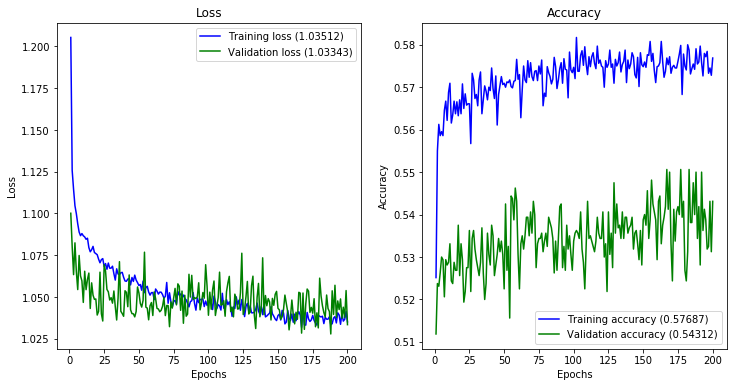

In [71]:
plot_history(history_l2)

__Observation:__

- With more training model tries to learn more on training data but couldn't do well on validation data
- The effect of regularizer can be seen in training score. It slightly lower than deeper model we tried above while it also ensured the validation scores are comparable. It seems balanced training for both train and validation
- With regularization model improved just slightly.

##### Full Report of Model performance on Validation Data

Accuracy : 0.543125

Classification Report
              precision    recall  f1-score   support

           0    0.33333   0.06250   0.10526        80
           1    0.60819   0.69546   0.64891       683
           2    0.48599   0.55520   0.51830       625
           3    0.46667   0.21649   0.29577       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.54312      1600
   macro avg    0.37884   0.30593   0.31365      1600
weighted avg    0.52271   0.54312   0.52059      1600

[[  5  57  18   0   0]
 [  6 475 200   2   0]
 [  3 234 347  41   0]
 [  1  13 138  42   0]
 [  0   2  11   5   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


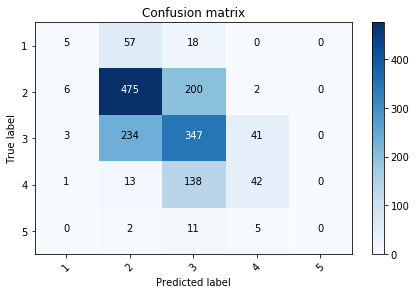

In [72]:
full_multiclass_report(l2_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Report of Model performance on Test Data

Accuracy : 0.5705

Classification Report
              precision    recall  f1-score   support

           0    0.33333   0.08000   0.12903       100
           1    0.63834   0.72131   0.67730       854
           2    0.51766   0.59974   0.55569       782
           3    0.45714   0.19835   0.27666       242
           4    0.00000   0.00000   0.00000        22

    accuracy                        0.57050      2000
   macro avg    0.38930   0.31988   0.32773      2000
weighted avg    0.54696   0.57050   0.54641      2000

[[  8  62  29   1   0]
 [  9 616 227   2   0]
 [  7 261 469  45   0]
 [  0  24 170  48   0]
 [  0   2  11   9   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


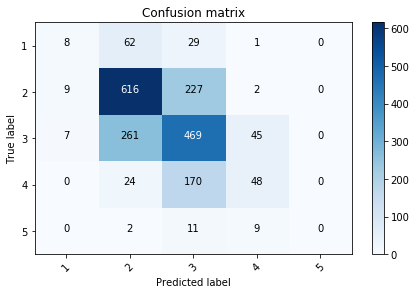

In [73]:
full_multiclass_report(l2_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [74]:
# evaluate the model
_, train_acc = l2_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.584, Test: 0.571


__Observation:__

- After adding L2 regularization, the test set error is reduced.

- The performance on the test set is better than the larger model.

- The L2 regularized model is much more resistant to overfitting than the larger model.

<a id=section3023></a>
#### 3.2.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [75]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  #model.add(Dropout(0.02))
  #model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
dropout_model = build_model()

In [76]:
dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                192       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 325       
Total params: 6,789
Trainable params: 6,789
Non-trainable params: 0
____________________________________________________

In [77]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.01)
# Compiling the model
dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
history_dropout = dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=200, validation_data=(normed_X_val, y_val_dummy), batch_size=500,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4972,  loss:1.2668,  val_accuracy:0.5181,  val_loss:1.0687,  
....................
Epoch: 20, accuracy:0.5844,  loss:0.9913,  val_accuracy:0.5387,  val_loss:1.0125,  
....................
Epoch: 40, accuracy:0.5841,  loss:0.9657,  val_accuracy:0.5462,  val_loss:1.0175,  
....................
Epoch: 60, accuracy:0.6092,  loss:0.9173,  val_accuracy:0.5362,  val_loss:1.0383,  
....................
Epoch: 80, accuracy:0.6225,  loss:0.8821,  val_accuracy:0.5475,  val_loss:1.0671,  
....................
Epoch: 100, accuracy:0.6344,  loss:0.8506,  val_accuracy:0.5519,  val_loss:1.1107,  
....................
Epoch: 120, accuracy:0.6338,  loss:0.8398,  val_accuracy:0.5406,  val_loss:1.1409,  
....................
Epoch: 140, accuracy:0.6489,  loss:0.8223,  val_accuracy:0.5425,  val_loss:1.1693,  
....................
Epoch: 160, accuracy:0.6522,  loss:0.7974,  val_accuracy:0.5444,  val_loss:1.1902,  
....................
Epoch: 180, accuracy:0.6606,  loss:0.7808,  val_acc

In [79]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.775793,0.669375,1.237485,0.535000,195
196,0.772063,0.659375,1.224286,0.531250,196
197,0.780746,0.663281,1.223800,0.540000,197
198,0.785186,0.662500,1.229832,0.535625,198
199,0.794647,0.658281,1.218945,0.536875,199


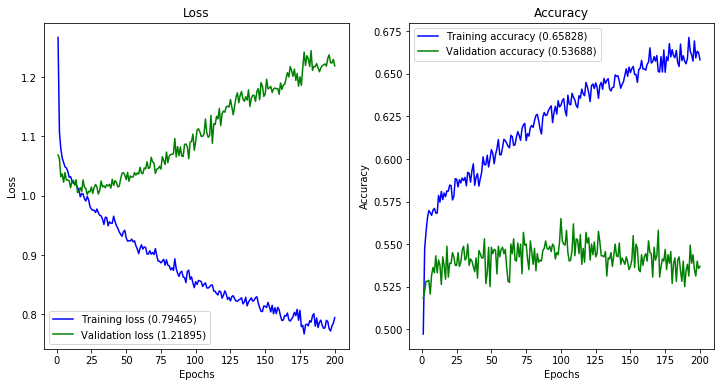

In [80]:
plot_history(history_dropout)

__Obseration:__
- With dropouts model training seems beeter than deeper model, however we can see that a trend of overfitting has happened
- After around 20 epochs training and Validation losses were almost same and scores were comparable. 
- As model trained for more epochs training losses reduced but validation losses increased
- Scores in Training increased more whereas validation scores reduced which again indicates overfitting

##### Full Report of Model performance on Validation Data

Accuracy : 0.536875

Classification Report
              precision    recall  f1-score   support

           0    0.10526   0.05000   0.06780        80
           1    0.62398   0.67057   0.64644       683
           2    0.49410   0.53600   0.51420       625
           3    0.46457   0.30412   0.36760       194
           4    0.13043   0.16667   0.14634        18

    accuracy                        0.53687      1600
   macro avg    0.36367   0.34547   0.34847      1600
weighted avg    0.52243   0.53687   0.52641      1600

[[  4  49  25   2   0]
 [ 13 458 198  11   3]
 [ 21 211 335  51   7]
 [  0  16 109  59  10]
 [  0   0  11   4   3]]


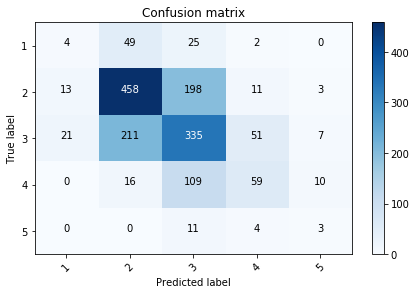

In [81]:
full_multiclass_report(dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Report of Model performance on Test Data

Accuracy : 0.5445

Classification Report
              precision    recall  f1-score   support

           0    0.10000   0.06000   0.07500       100
           1    0.62882   0.67447   0.65085       854
           2    0.52586   0.54604   0.53576       782
           3    0.41270   0.32231   0.36195       242
           4    0.08696   0.09091   0.08889        22

    accuracy                        0.54450      2000
   macro avg    0.35087   0.33875   0.34249      2000
weighted avg    0.53001   0.54450   0.53592      2000

[[  6  52  39   2   1]
 [ 36 576 216  23   3]
 [ 14 259 427  75   7]
 [  4  24 126  78  10]
 [  0   5   4  11   2]]


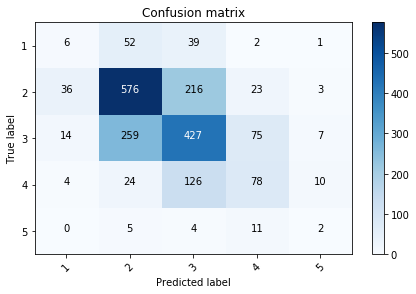

In [82]:
full_multiclass_report(dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [83]:
# evaluate the model
_, train_acc = dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.698, Test: 0.544


__Observation:__
- Prediction accuracy on train is more than on train data

- The performance is better than the larger model but stil not good performance
- We will keep trying

<a id=section3024></a>
#### 3.2.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [84]:
from tensorflow.keras import regularizers

In [85]:
def build_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  

  return model
l2_dropout_model = build_model()

In [86]:
l2_dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               3072      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)              

In [87]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
history_l2_dropout = l2_dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), batch_size=300,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])



Epoch: 0, accuracy:0.5272,  loss:2.3205,  val_accuracy:0.4975,  val_loss:1.9995,  
....................
Epoch: 20, accuracy:0.5655,  loss:1.0863,  val_accuracy:0.5356,  val_loss:1.0519,  
....................
Epoch: 40, accuracy:0.5702,  loss:1.0615,  val_accuracy:0.5381,  val_loss:1.0545,  
....................
Epoch: 60, accuracy:0.5725,  loss:1.0479,  val_accuracy:0.5437,  val_loss:1.0356,  
....................
Epoch: 80, accuracy:0.5773,  loss:1.0372,  val_accuracy:0.5181,  val_loss:1.1105,  
....................
Epoch: 100, accuracy:0.5833,  loss:1.0275,  val_accuracy:0.5369,  val_loss:1.0668,  
....................
Epoch: 120, accuracy:0.5880,  loss:1.0224,  val_accuracy:0.5344,  val_loss:1.0560,  
....................
Epoch: 140, accuracy:0.5847,  loss:1.0187,  val_accuracy:0.5412,  val_loss:1.0423,  
....................
Epoch: 160, accuracy:0.5970,  loss:1.0074,  val_accuracy:0.5312,  val_loss:1.0719,  
....................
Epoch: 180, accuracy:0.5961,  loss:0.9958,  val_acc

In [89]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.005968,0.591406,1.050230,0.547500,195
196,0.999203,0.589844,1.065316,0.540000,196
197,0.994456,0.593594,1.062930,0.554375,197
198,1.001239,0.591563,1.066540,0.536250,198
199,0.996863,0.594375,1.044271,0.558125,199


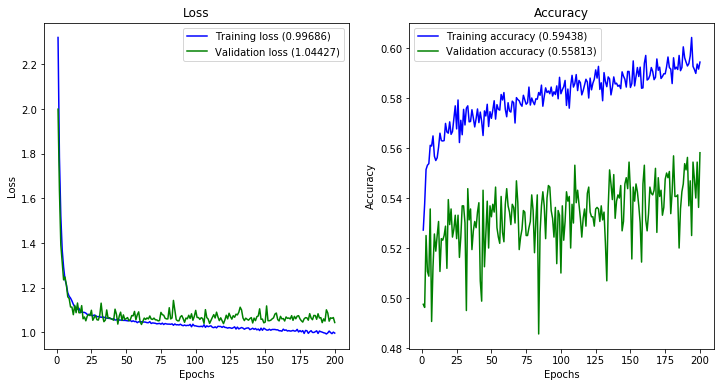

In [90]:
plot_history(history_l2_dropout)

__Observation:__

- With regularization and dropout together we can see model has refrained from overfitting to and extent
- Train and Validation losses are comparable however, train loss has gone further down.
- Accuracy score for training has always improved as compared to validation accuracy
- Above curves show the dropout effects on train and validation accuracy.

##### Full Report of Model performance on Validation Data

Accuracy : 0.558125

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.61935   0.72182   0.66667       683
           2    0.50442   0.54720   0.52494       625
           3    0.48333   0.29897   0.36943       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.55812      1600
   macro avg    0.32142   0.31360   0.31221      1600
weighted avg    0.52003   0.55812   0.53443      1600

[[  0  58  21   1   0]
 [  0 493 185   5   0]
 [  0 229 342  51   3]
 [  0  15 118  58   3]
 [  0   1  12   5   0]]


C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


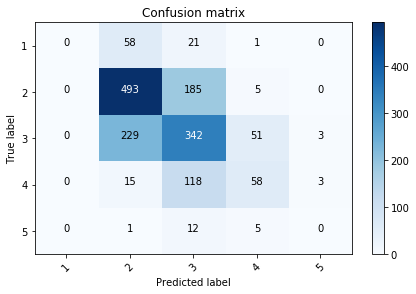

In [91]:
full_multiclass_report(l2_dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Report of Model performance on Test Data

Accuracy : 0.572

Classification Report
              precision    recall  f1-score   support

           0    0.75000   0.03000   0.05769       100
           1    0.63163   0.69672   0.66258       854
           2    0.52013   0.59463   0.55489       782
           3    0.51948   0.33058   0.40404       242
           4    0.16667   0.04545   0.07143        22

    accuracy                        0.57200      2000
   macro avg    0.51758   0.33948   0.35013      2000
weighted avg    0.57527   0.57200   0.55245      2000

[[  3  59  37   1   0]
 [  1 595 251   6   1]
 [  0 259 465  56   2]
 [  0  27 133  80   2]
 [  0   2   8  11   1]]


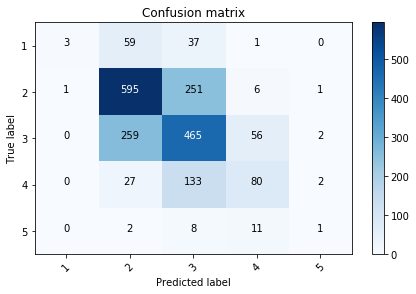

In [92]:
full_multiclass_report(l2_dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [93]:
# evaluate the model
_, train_acc = l2_dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.608, Test: 0.572


__Observation:__

- The combined L2 + Dropout model gives train and Test scores comparable and show restrain from overfitting

- Considering we are getting validation scores fluctuation after certain epochs and scores are not improving after certain number of epochs we can attain a score if we apply the Early Stopping callback to this model. This may surely help in model getting overfitted for traning data
- Let's try Batch normalization as our next step to see if model performs even better

<a id=section3025></a>
#### 3.2.5 Batch Normalization

- Batch normalization applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [94]:
def build_model():
  model = Sequential()
  model.add(Dense(256, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(output_shape, activation='softmax'))    

  return model
bnorm_model = build_model()

In [95]:
bnorm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               1536      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)              

In [96]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
bnorm_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
history_batch_norm = bnorm_model.fit(normed_X_train, y_train_dummy, batch_size=300, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=80), tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5163,  loss:1.2391,  val_accuracy:0.5019,  val_loss:1.4260,  
....................
Epoch: 20, accuracy:0.5987,  loss:0.9203,  val_accuracy:0.5175,  val_loss:1.0269,  
....................
Epoch: 40, accuracy:0.6227,  loss:0.8600,  val_accuracy:0.5256,  val_loss:1.0838,  
....................
Epoch: 60, accuracy:0.6445,  loss:0.8036,  val_accuracy:0.5275,  val_loss:1.1454,  
....................
Epoch: 80, accuracy:0.6730,  loss:0.7586,  val_accuracy:0.5188,  val_loss:1.1433,  
..................

In [98]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
93,0.734789,0.673125,1.246406,0.526875,93
94,0.740083,0.669375,1.248856,0.533750,94
95,0.744083,0.668750,1.198925,0.510000,95
96,0.733302,0.677188,1.246965,0.548125,96
97,0.725914,0.684375,1.206717,0.499375,97


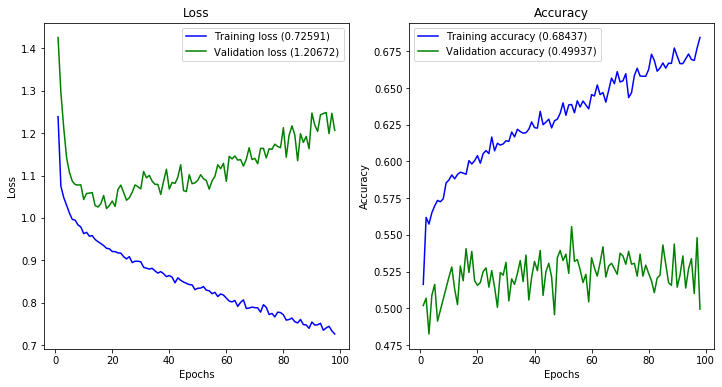

In [99]:
plot_history(history_batch_norm)

__Observation:__

- We can see batch normanization performed very similar to our Dropout model
- Training score increased but validation score didnot increase much

##### Full Report of Model performance on Validation Data

Accuracy : 0.499375

Classification Report
              precision    recall  f1-score   support

           0    0.25000   0.07500   0.11538        80
           1    0.58434   0.56808   0.57610       683
           2    0.45906   0.54720   0.49927       625
           3    0.43056   0.31959   0.36686       194
           4    0.04348   0.05556   0.04878        18

    accuracy                        0.49938      1600
   macro avg    0.35349   0.31309   0.32128      1600
weighted avg    0.49395   0.49938   0.49175      1600

[[  6  44  28   2   0]
 [ 14 388 268  12   1]
 [  4 210 342  60   9]
 [  0  21  99  62  12]
 [  0   1   8   8   1]]


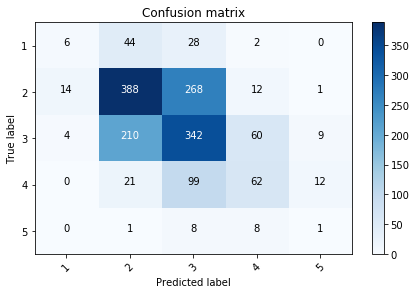

In [100]:
full_multiclass_report(bnorm_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Report of Model performance on Test Data

Accuracy : 0.522

Classification Report
              precision    recall  f1-score   support

           0    0.17241   0.05000   0.07752       100
           1    0.61576   0.59485   0.60512       854
           2    0.47639   0.58056   0.52334       782
           3    0.44848   0.30579   0.36364       242
           4    0.10714   0.13636   0.12000        22

    accuracy                        0.52200      2000
   macro avg    0.36404   0.33351   0.33792      2000
weighted avg    0.51326   0.52200   0.51221      2000

[[  5  51  42   1   1]
 [ 13 508 316  15   2]
 [ 10 237 454  69  12]
 [  1  28 129  74  10]
 [  0   1  12   6   3]]


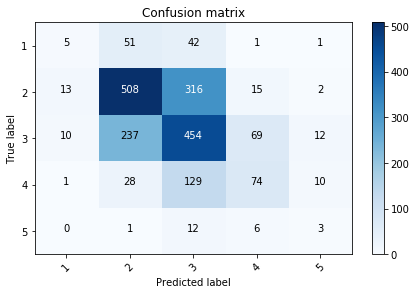

In [101]:
full_multiclass_report(bnorm_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [102]:
# evaluate the model
_, train_acc = bnorm_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = bnorm_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.684, Test: 0.522


__Observation:__
- The Batch Normalization model attains the **lowest train set error**.

- We have seen significant **overfitting** here.

- It is not generalizing well on the test set.
- We can also incorporate the Early Stopping callback to this model to stop training at an appropriate epoch.

<a id=section303></a>
### 3.3. Hyperparamter Tuning

<a id=section3031></a>
#### 3.3.1 Grid Search

Trying Grid Search with hyperparameters. We wil be able to find parameters which will give best accuracy for our dataset

In [103]:
for index, lsize in enumerate([[6],[16],[32]]):
    print(index, lsize)

0 [6]
1 [16]
2 [32]


In [106]:
def create_model(dropout_rate,optimizer,init,layers,activation):
    model = Sequential()
    for index, lsize in enumerate(layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize, activation=activation, input_shape=input_shape))
        else:
            model.add(Dense(lsize, activation=activation))
   
    model.add(Dropout(dropout_rate))            
    model.add(Dense(output_shape,activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

#hyperparameters
layers = [(6,),(16,),(32,)]
activation=['relu','tanh']
optimizers = ['rmsprop', 'adam']
dropout_rate = [0.1, 0.2, 0.3, 0.4]
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [150, 500]
batches = [300,500]
param_dist = dict(optimizer=optimizers,
layers=layers,
dropout_rate=dropout_rate,
epochs=epochs,
batch_size=batches,
init=init,
activation=activation
)

grid1 = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_jobs=-1, cv=6)

In [107]:
grid_results = grid1.fit(normed_X_train,y_train)
print('Parameters of the best model: ')
print(grid_results.best_params_)

Parameters of the best model: 
{'optimizer': 'adam', 'layers': (32,), 'init': 'uniform', 'epochs': 500, 'dropout_rate': 0.3, 'batch_size': 300, 'activation': 'relu'}


In [116]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape, kernel_initializer = 'uniform'))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation='relu', kernel_initializer = 'uniform'))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
gs_model = build_model()
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.001)
# Compiling the model
gs_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
history_gs = gs_model.fit(normed_X_train, y_train_dummy, batch_size=300, class_weight=weights, epochs=500, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=5)])


Epoch: 0, accuracy:0.4944,  loss:1.6043,  val_accuracy:0.4988,  val_loss:1.5067,  
.....
Epoch: 5, accuracy:0.5433,  loss:1.1243,  val_accuracy:0.5213,  val_loss:1.0711,  
.....
Epoch: 10, accuracy:0.5539,  loss:1.0951,  val_accuracy:0.5238,  val_loss:1.0532,  
.....
Epoch: 15, accuracy:0.5469,  loss:1.0857,  val_accuracy:0.5194,  val_loss:1.0491,  
.....
Epoch: 20, accuracy:0.5539,  loss:1.0843,  val_accuracy:0.5206,  val_loss:1.0462,  
.....
Epoch: 25, accuracy:0.5564,  loss:1.0777,  val_accuracy:0.5231,  val_loss:1.0424,  
.....
Epoch: 30, accuracy:0.5573,  loss:1.0762,  val_accuracy:0.5238,  val_loss:1.0409,  
.....
Epoch: 35, accuracy:0.5602,  loss:1.0758,  val_accuracy:0.5238,  val_loss:1.0383,  
.....
Epoch: 40, accuracy:0.5578,  loss:1.0716,  val_accuracy:0.5281,  val_loss:1.0368,  
.....
Epoch: 45, accuracy:0.5600,  loss:1.0705,  val_accuracy:0.5250,  val_loss:1.0337,  
.....
Epoch: 50, accuracy:0.5609,  loss:1.0682,  val_accuracy:0.5300,  val_loss:1.0336,  
.....
Epoch: 55, 

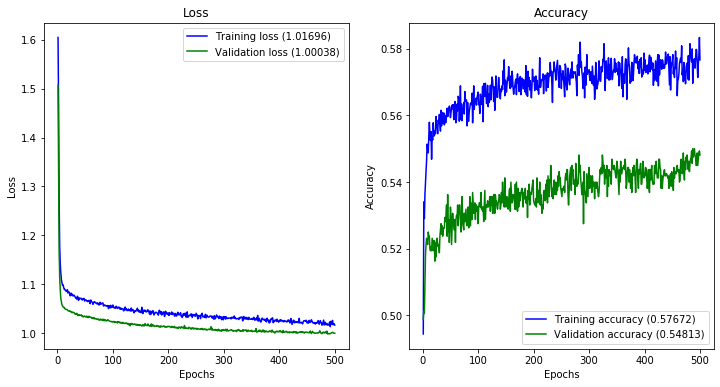

In [117]:
plot_history(history_gs)

__Observation:__ Looking aat the graph above performance of the best model has also gave 54% validation accuracy. 

In [114]:
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'
                ):
  model = Sequential()

  for index, lsize in enumerate(dense_layers):
    # Input Layer - includes the input_shape
    if index == 0:
      model.add(Dense(lsize, activation=activation, input_shape=input_shape))
    else:
      model.add(Dense(lsize, activation=activation))
            
  model.add(Dense(output_shape,activation='softmax'))
  model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [(6,),(16,),(32,)],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[50,300]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['accuracy'],
                    refit='accuracy')


In [115]:
grid_results = grid.fit(normed_X_train,y_train)
print('Parameters of the best model: ')
print(grid_results.best_params_)

Parameters of the best model: 
{'activation': 'relu', 'batch_size': 50, 'dense_layers': (32,), 'epochs': 50, 'optimizer': 'adam'}


#### Checking model performance with parameters suggested by Grid search 

In [118]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
gs_model = build_model()
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.001)
# Compiling the model
gs_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
history_gs = gs_model.fit(normed_X_train, y_train_dummy, batch_size=50, class_weight=weights, epochs=50, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=5)])


Epoch: 0, accuracy:0.5008,  loss:1.2604,  val_accuracy:0.5138,  val_loss:1.0955,  
.....
Epoch: 5, accuracy:0.5661,  loss:1.0678,  val_accuracy:0.5387,  val_loss:1.0342,  
.....
Epoch: 10, accuracy:0.5689,  loss:1.0498,  val_accuracy:0.5394,  val_loss:1.0249,  
.....
Epoch: 15, accuracy:0.5750,  loss:1.0384,  val_accuracy:0.5281,  val_loss:1.0187,  
.....
Epoch: 20, accuracy:0.5755,  loss:1.0293,  val_accuracy:0.5331,  val_loss:1.0230,  
.....
Epoch: 25, accuracy:0.5797,  loss:1.0224,  val_accuracy:0.5412,  val_loss:1.0135,  
.....
Epoch: 30, accuracy:0.5784,  loss:1.0192,  val_accuracy:0.5275,  val_loss:1.0115,  
.....
Epoch: 35, accuracy:0.5805,  loss:1.0116,  val_accuracy:0.5412,  val_loss:1.0100,  
.....
Epoch: 40, accuracy:0.5859,  loss:1.0077,  val_accuracy:0.5394,  val_loss:1.0142,  
.....
Epoch: 45, accuracy:0.5894,  loss:1.0048,  val_accuracy:0.5350,  val_loss:1.0129,  
.....

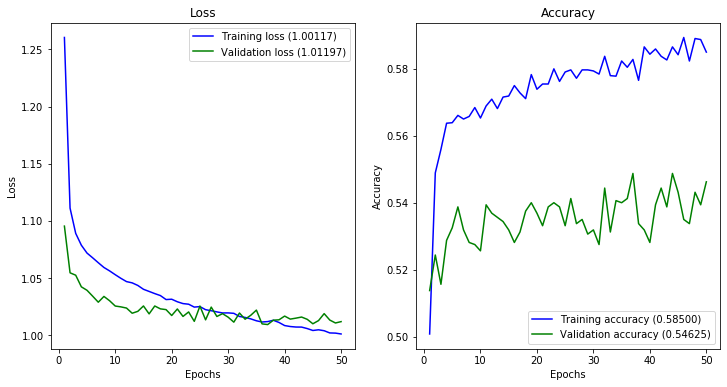

In [119]:
plot_history(history_gs)

__Observation:__ Performance of Model obtained from best parameters suggested by Grid search is comparable to our deeper models with regularizers we have tried. Offcourse with far more less resources

<a id=section3032></a>
#### 3.3.2 Hyperparamter Tuning using HyperModel

In [146]:
class MultiClassHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        
        model = Sequential()
        #Input Layer
        model.add(Dense(
                units=hp.Int('input_units', 32, 256, 32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh'],
                    default='relu'),
                input_shape=input_shape, 
                kernel_initializer='uniform'
                #, bias_initializer='zeros'
            )
        )
        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)                    
            )   
          )
        model.add(Dense(
                units=hp.Int(f"hid_{i}_units", min_value= 32, max_value=512, step=32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu'),
                    kernel_initializer='glorot_uniform'                
            )
          )
        

        #Output layer
        model.add(Dense(output_shape, activation='softmax'))
        #hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
        optimizer = hp.Choice('optimizer', ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        #keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
        model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
        
        return model

In [147]:
hypermodel = MultiClassHyperModel(input_shape)

### Build, Run and Evaluate Random Search Tuner

In [154]:
import time
LOG_DIR = f"rs{int(time.time())}"
print(LOG_DIR)
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=1,
            executions_per_trial=1, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tfdocs.modeling.EpochDots( report_every=5)]
tuner_rs.search(normed_X_train, y_train_dummy, epochs=100, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=1)




Trial 1 Complete [00h 00m 31s]
val_accuracy: 0.528124988079071

Best val_accuracy So Far: 0.528124988079071
Total elapsed time: 00h 00m 31s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_rs.search_space_summary()

In [ ]:
tuner_rs.results_summary()

In [ ]:
tuner_rs.get_best_hyperparameters()[0].values

In [ ]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal number of nodes in first hidden layer
is {best_hps.get('hid_0_units')}.
""")

In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

### Build, Run and Evaluate Hyperband Tuner

In [157]:
import time
LOG_DIR =  f"hb{int(time.time())}"
print(LOG_DIR)
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=2,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=1,
            directory=LOG_DIR
        )
callbacks = [tfdocs.modeling.EpochDots( report_every=2)]
tuner_hb.search(normed_X_train, y_train_dummy, epochs=200, validation_data=(normed_X_val, y_val_dummy), batch_size=500, verbose=0, callbacks=callbacks)



hb1622376105

Epoch: 0, accuracy:0.2423,  loss:1.6076,  val_accuracy:0.2988,  val_loss:1.6039,  
..
Epoch: 0, accuracy:0.4961,  loss:1.4208,  val_accuracy:0.5150,  val_loss:1.2087,  
..INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal nodes on 1st Layer
is {best_hps.get('hid_0_units')}.
""")

In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

### Build, Run and Evaluate Bayesian Optimization Tuner

In [158]:
import time
LOG_DIR =  f"bo{int(time.time())}"
print(LOG_DIR)
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory=LOG_DIR
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
callbacks =  [tfdocs.modeling.EpochDots( report_every=20)]
tuner_bo.search(normed_X_train, y_train_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)



bo1622376170

Epoch: 0, accuracy:0.4486,  loss:1.5532,  val_accuracy:0.4925,  val_loss:1.5101,  
....................
Epoch: 20, accuracy:0.5492,  loss:1.0426,  val_accuracy:0.5213,  val_loss:1.0716,  
....................
Epoch: 40, accuracy:0.5614,  loss:1.0198,  val_accuracy:0.5300,  val_loss:1.0515,  
....................
Epoch: 60, accuracy:0.5605,  loss:1.0124,  val_accuracy:0.5288,  val_loss:1.0449,  
....................
Epoch: 80, accuracy:0.5602,  loss:1.0093,  val_accuracy:0.5269,  val_loss:1.0412,  
....................
Epoch: 100, accuracy:0.5644,  loss:1.0065,  val_accuracy:0.5300,  val_loss:1.0388,  
....................
Epoch: 120, accuracy:0.5648,  loss:1.0029,  val_accuracy:0.5281,  val_loss:1.0370,  
....................
Epoch: 140, accuracy:0.5653,  loss:1.0029,  val_accuracy:0.5294,  val_loss:1.0356,  
....................
Epoch: 160, accuracy:0.5669,  loss:1.0027,  val_accuracy:0.5312,  val_loss:1.0344,  
....................
Epoch: 180, accuracy:0.5680,  loss:0.9

C:\Users\nando\AppData\Roaming\Python\Python37\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)



Epoch: 0, accuracy:0.4944,  loss:1.4322,  val_accuracy:0.5138,  val_loss:1.3441,  
....................
Epoch: 20, accuracy:0.5519,  loss:1.0277,  val_accuracy:0.5219,  val_loss:1.0588,  
....................
Epoch: 40, accuracy:0.5542,  loss:1.0216,  val_accuracy:0.5225,  val_loss:1.0523,  
....................
Epoch: 60, accuracy:0.5522,  loss:1.0185,  val_accuracy:0.5200,  val_loss:1.0506,  
....................
Epoch: 80, accuracy:0.5508,  loss:1.0160,  val_accuracy:0.5219,  val_loss:1.0496,  
....................
Epoch: 100, accuracy:0.5503,  loss:1.0163,  val_accuracy:0.5219,  val_loss:1.0491,  
....................
Epoch: 120, accuracy:0.5519,  loss:1.0148,  val_accuracy:0.5219,  val_loss:1.0485,  
....................
Epoch: 140, accuracy:0.5505,  loss:1.0144,  val_accuracy:0.5225,  val_loss:1.0481,  
....................
Epoch: 160, accuracy:0.5544,  loss:1.0142,  val_accuracy:0.5231,  val_loss:1.0478,  
....................
Epoch: 180, accuracy:0.5542,  loss:1.0158,  val_acc

In [159]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal nodes on 1st Layer
is {best_hps.get('hid_0_units')}.
""")

predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

63/63 [==============================] - 0s 2ms/step - loss: 1.0705 - accuracy: 0.5535
Random search Val Accuracy:  0.5534999966621399

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal nodes on 1st Layer
is 448.

predictions shape: (3, 5)
[[0.04069876 0.19057275 0.49215403 0.24067041 0.03590399]
 [0.03333207 0.5399553  0.3485156  0.0550029  0.02319408]
 [0.01725458 0.5632298  0.35665426 0.04988679 0.01297449]]


,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Inactive_Threats,Citizen_Fear_Index,Troops_Mobilized(thousands)
9964,-1.057514,0.358556,-0.815583,0.138426,0.360235
4050,-1.057514,-0.510012,0.570244,-0.104266,-0.590363
3768,-1.057514,0.920570,0.924072,0.943721,-0.305184


<a id=section4></a>
## 4. Data imbalance treatment using SMOTE

Trying SMOTE to create sythatic data records for class with low presence in dataset  

In [160]:
#install library to support SMOTE
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\nando\appdata\roaming\python\python37\site-packages (0.24.2)


<a id=section401></a>
### 4.1 Generate Data using SMOTE and run Models

In [161]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(normed_X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 2733), (1, 2733), (2, 2733), (3, 2733), (4, 2733)]


- __Generated synthetic data only for Training dataset. We will run all the models we have created previously for newlwy generated data__

In [162]:
y_resampled_dummy = np_utils.to_categorical(y_resampled, num_classes=5)

In [163]:
X_resampled.shape, y_resampled_dummy.shape

((13665, 5), (13665, 5))

<a id=section4011></a>
#### 4.1.1 Basic Perceptron Model

In [164]:
history = model.fit(X_resampled, y_resampled_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.3736,  loss:1.3561,  val_accuracy:0.2912,  val_loss:1.4245,  
....................
Epoch: 20, accuracy:0.4620,  loss:1.2089,  val_accuracy:0.3406,  val_loss:1.4517,  
....................
Epoch: 40, accuracy:0.4579,  loss:1.2097,  val_accuracy:0.3606,  val_loss:1.4115,  
....................
Epoch: 60, accuracy:0.4718,  loss:1.2004,  val_accuracy:0.3769,  val_loss:1.3885,  
....................
Epoch: 80, accuracy:0.4785,  loss:1.2092,  val_accuracy:0.3831,  val_loss:1.3822,  
....................
Epoch: 100, accuracy:0.4932,  loss:1.1932,  val_accuracy:0.3706,  val_loss:1.4789,  
....................
Epoch: 120, accuracy:0.4923,  loss:1.1969,  val_accuracy:0.3775,  val_loss:1.4547,  
....................
Epoch: 140, accuracy:0.4933,  loss:1.2016,  val_accuracy:0.3812,  val_loss:1.4702,  
....................
Epoch: 160, accuracy:0.4948,  loss:1.2042,  val_accuracy:0.3544,  val_loss:1.4687,  
....................
Epoch: 180, accuracy:0.4896,  loss:1.2104,  val_acc

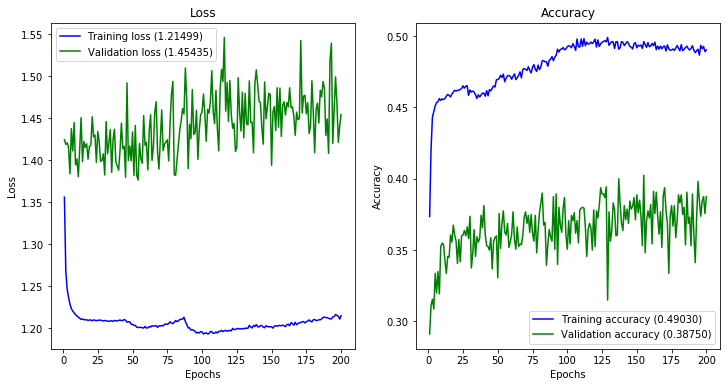

In [172]:
plot_history(history)

<a id=section4012></a>
#### 4.1.2 Multilayer Deep Model

In [165]:
history_multilayered_model = multilayered_model.fit(X_resampled, y_resampled_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.6172,  loss:0.9115,  val_accuracy:0.4300,  val_loss:1.3274,  
....................
Epoch: 20, accuracy:0.6750,  loss:0.7820,  val_accuracy:0.4744,  val_loss:1.3612,  
....................
Epoch: 40, accuracy:0.6980,  loss:0.7445,  val_accuracy:0.4313,  val_loss:1.4769,  
....................
Epoch: 60, accuracy:0.7033,  loss:0.7243,  val_accuracy:0.4556,  val_loss:1.6391,  
....................
Epoch: 80, accuracy:0.7102,  loss:0.7101,  val_accuracy:0.4031,  val_loss:1.7587,  
....................
Epoch: 100, accuracy:0.7170,  loss:0.7007,  val_accuracy:0.4469,  val_loss:1.7905,  
....................
Epoch: 120, accuracy:0.7232,  loss:0.6918,  val_accuracy:0.4256,  val_loss:1.8044,  
....................
Epoch: 140, accuracy:0.7221,  loss:0.6833,  val_accuracy:0.4075,  val_loss:1.9850,  
....................
Epoch: 160, accuracy:0.7292,  loss:0.6706,  val_accuracy:0.4681,  val_loss:1.9534,  
....................
Epoch: 180, accuracy:0.7345,  loss:0.6759,  val_acc

<a id=section4013></a>
#### 4.1.3 Model with L2 Regulariser 

In [166]:
history_l2_model = l2_model.fit(X_resampled, y_resampled_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5319,  loss:1.1441,  val_accuracy:0.3575,  val_loss:1.3839,  
....................
Epoch: 20, accuracy:0.5818,  loss:1.0607,  val_accuracy:0.3944,  val_loss:1.3223,  
....................
Epoch: 40, accuracy:0.5784,  loss:1.0659,  val_accuracy:0.3288,  val_loss:1.4511,  
....................
Epoch: 60, accuracy:0.5884,  loss:1.0434,  val_accuracy:0.3487,  val_loss:1.4120,  
....................
Epoch: 80, accuracy:0.5911,  loss:1.0369,  val_accuracy:0.4144,  val_loss:1.3121,  
....................
Epoch: 100, accuracy:0.5932,  loss:1.0348,  val_accuracy:0.3769,  val_loss:1.3769,  
....................
Epoch: 120, accuracy:0.5965,  loss:1.0277,  val_accuracy:0.3925,  val_loss:1.3113,  
....................
Epoch: 140, accuracy:0.6023,  loss:1.0269,  val_accuracy:0.3638,  val_loss:1.3548,  
....................
Epoch: 160, accuracy:0.6018,  loss:1.0221,  val_accuracy:0.4162,  val_loss:1.2950,  
....................
Epoch: 180, accuracy:0.6024,  loss:1.0197,  val_acc

<a id=section4014></a>
#### 4.1.4  Model with Dropouts 

In [167]:
history_dropout_model = dropout_model.fit(X_resampled, y_resampled_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4997,  loss:1.1706,  val_accuracy:0.3400,  val_loss:1.3551,  
....................
Epoch: 20, accuracy:0.6428,  loss:0.8670,  val_accuracy:0.3931,  val_loss:1.3375,  
....................
Epoch: 40, accuracy:0.6580,  loss:0.8278,  val_accuracy:0.3844,  val_loss:1.3854,  
....................
Epoch: 60, accuracy:0.6637,  loss:0.8237,  val_accuracy:0.4013,  val_loss:1.3699,  
....................
Epoch: 80, accuracy:0.6699,  loss:0.8055,  val_accuracy:0.3869,  val_loss:1.4322,  
....................
Epoch: 100, accuracy:0.6794,  loss:0.7847,  val_accuracy:0.4169,  val_loss:1.3656,  
....................
Epoch: 120, accuracy:0.6793,  loss:0.7835,  val_accuracy:0.4038,  val_loss:1.4152,  
....................
Epoch: 140, accuracy:0.6815,  loss:0.7914,  val_accuracy:0.4225,  val_loss:1.4060,  
....................
Epoch: 160, accuracy:0.6860,  loss:0.7774,  val_accuracy:0.4437,  val_loss:1.3547,  
....................
Epoch: 180, accuracy:0.6932,  loss:0.7637,  val_acc

<a id=section4015></a>
#### 4.1.5  Model with Regularizer and Dropouts 

In [168]:
history_l2_dropout_model = l2_dropout_model.fit(X_resampled, y_resampled_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5667,  loss:1.0799,  val_accuracy:0.4162,  val_loss:1.3350,  
....................
Epoch: 20, accuracy:0.6434,  loss:0.9558,  val_accuracy:0.3894,  val_loss:1.4139,  
....................
Epoch: 40, accuracy:0.6657,  loss:0.9165,  val_accuracy:0.4219,  val_loss:1.3328,  
....................
Epoch: 60, accuracy:0.6810,  loss:0.8991,  val_accuracy:0.3619,  val_loss:1.5190,  
....................
Epoch: 80, accuracy:0.6864,  loss:0.8829,  val_accuracy:0.4144,  val_loss:1.4014,  
....................
Epoch: 100, accuracy:0.6924,  loss:0.8757,  val_accuracy:0.4900,  val_loss:1.3614,  
....................
Epoch: 120, accuracy:0.6932,  loss:0.8706,  val_accuracy:0.4200,  val_loss:1.4671,  
....................
Epoch: 140, accuracy:0.6993,  loss:0.8664,  val_accuracy:0.4100,  val_loss:1.5815,  
....................
Epoch: 160, accuracy:0.7019,  loss:0.8602,  val_accuracy:0.4694,  val_loss:1.4123,  
....................
Epoch: 180, accuracy:0.7024,  loss:0.8596,  val_acc

<a id=section4016></a>
#### 4.1.6  Batch Normalized model 

In [170]:
history_bnorm = bnorm_model.fit(X_resampled, y_resampled_dummy, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5606,  loss:1.0406,  val_accuracy:0.4038,  val_loss:1.3128,  
.

<a id=section4017></a>
#### 4.1.7 Random Search Tuner 

In [171]:
import time
LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=5,
            executions_per_trial=3, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tfdocs.modeling.EpochDots( report_every=20)]
tuner_rs.search(X_resampled, y_resampled_dummy, epochs=20, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)





Epoch: 0, accuracy:0.2965,  loss:1.5964,  val_accuracy:0.1406,  val_loss:1.6112,  
....................
Epoch: 0, accuracy:0.2542,  loss:1.5904,  val_accuracy:0.2931,  val_loss:1.5818,  
....................
Epoch: 0, accuracy:0.3606,  loss:1.5832,  val_accuracy:0.2169,  val_loss:1.6025,  
....................
Epoch: 0, accuracy:0.4357,  loss:1.2647,  val_accuracy:0.3050,  val_loss:1.4011,  
....................
Epoch: 0, accuracy:0.4405,  loss:1.2609,  val_accuracy:0.3600,  val_loss:1.3611,  
....................
Epoch: 0, accuracy:0.4386,  loss:1.2655,  val_accuracy:0.3394,  val_loss:1.3922,  
....................
Epoch: 0, accuracy:0.2273,  loss:1.6055,  val_accuracy:0.4550,  val_loss:1.5915,  
....................
Epoch: 0, accuracy:0.2552,  loss:1.5976,  val_accuracy:0.2713,  val_loss:1.5970,  
....................
Epoch: 0, accuracy:0.2126,  loss:1.6053,  val_accuracy:0.3319,  val_loss:1.5927,  
....................
Epoch: 0, accuracy:0.3737,  loss:1.4290,  val_accuracy:0.2594, 

<a id=section5></a>
## 5. Conclusion

As part of Deep learning basics understanding project I had taken a multiclass problem. Objective was to create models and provide various options I have learnt. Following are the findings after performing data analysis and running various models on the data:

- Data was less for models to learn appropriately and generalize well, therefore model accuracy for validation and test data could not go beyond 58% among all the trained models. I've trained models with following various concepts learnt:

  - **Basic perceptron**

  - **Deep network**

  - **Deep network with Dropouts**
  
  - **Deep network Weight Regularization**

  - **Deep network Weight Regularization and Dropout**

  - **Deep network Batch Normalization**
  
  - **Hyperparameter tuning**
  
  - **Synthetic data generation using SMOTE and model trainning**
  
- Our data was imbalanced, we had more data for classes 2,3 whereas very less data for class 1 and 5. I've managed imbalanced by passing class weights in the models and later performed datasampling technique SMOTE to generate more data for low count classes. However, oversampled dataset could not achive better results for validation and test data

- Our data set was about Defence readiness for a country in certain situation which is surely a mission critical information. If our model could have given better prediction it would have been a great benefit.

- I believe, if we get more data for training our models could generalize better and predict better than current performance of aproax 58%